Bertipaglia Beatrice Sofia 

Sartori Francesco

# **Loading the dataset**

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60000 examples and a test set of 10000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen

def load_fashion_mnist():

    url_base = "https://www.math.unipd.it/~dasan/"
    Y_train = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_train = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_train), 784) 
    Y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_test), 784)

    return X_train, Y_train, X_test, Y_test


In [ ]:
Y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_train, Y_train, X_test, Y_test = load_fashion_mnist()
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


Let's display a set of random images of different classes.

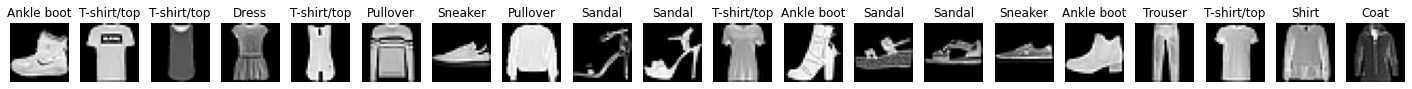

In [ ]:
plt.figure(figsize=(25, 5))
for idx in range(20):
    plt.subplot(1, 20, idx + 1)
    img = X_train[idx].reshape(28, 28)
    plt.title(f'{Y_labels[Y_train[idx]]}')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

# **Processing Data**

In [ ]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

To smooth the workflow we transform the datasets into pandas DataFrame.

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

 Let's check for NA values, we can see that there aren't NA values in the dataset.

In [ ]:
print(X_train.isna().sum().sum())

0


Now we check that the classes are equally distributed, both on the training set and the test set.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


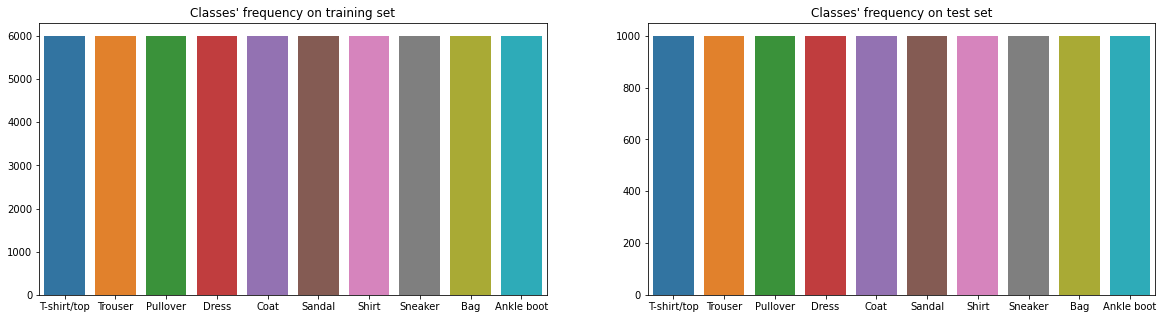

In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)
unique_test, counts_test = np.unique(Y_test, return_counts=True)

fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,2,1)
ax1= sns.barplot(Y_labels,counts)
ax1.set_title("Classes' frequency on training set")

ax2 = fig.add_subplot(1,2,2)
ax2 = sns.barplot(Y_labels,counts_test)
ax2.set_title("Classes' frequency on test set")

fig.show()

To avoid any convergence issue we scale our data with MinMaxScaler.

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# **1) AdaBoost with base estimator Decision Tree**

Adaptive Boosting is an algorithm that combine a set of weak learners (in our case Decision Tree) to improve the performance.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import datetime

To start we chose to train our model on a 5000 units training set, because the algorithm takes a lot of time to be fitted on the entire training set.

We used the reduced dataset in order to determine which change of parameters improved the most the performance of our model.

In [ ]:
max_d = [1, 3, 5, 7, 9]
n_est = [50, 100, 150, 200]
te_acc = []
r_time = []

for md in max_d:
  te_acc_md = []
  r_time_md = []
  for ne in n_est:

    start = datetime.datetime.now()

    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=md), n_estimators=ne)
    clf.fit(X_train[:5000], Y_train[:5000])
    Y_train_pred = clf.predict(X_train[:5000])
    Y_test_pred = clf.predict(X_test)
    tr_acc = accuracy_score(Y_train[:5000], Y_train_pred)
    test_acc= accuracy_score(Y_test, Y_test_pred)

    difference = datetime.datetime.now()-start

    te_acc_md.append(test_acc)
    r_time_md.append(difference.seconds)

    print(f"max_depth = {md}, n_estimators = {ne}. Train Acc: {tr_acc}, Test Acc: {test_acc}. Time: {difference.seconds} seconds.")
  te_acc.append(te_acc_md)
  r_time.append(r_time_md)

max_depth = 1, n_estimators = 50. Train Acc: 0.3744, Test Acc: 0.3653. Time: 10 seconds.
max_depth = 1, n_estimators = 100. Train Acc: 0.3744, Test Acc: 0.3653. Time: 21 seconds.
max_depth = 1, n_estimators = 150. Train Acc: 0.3744, Test Acc: 0.3653. Time: 32 seconds.
max_depth = 1, n_estimators = 200. Train Acc: 0.3744, Test Acc: 0.3653. Time: 42 seconds.
max_depth = 3, n_estimators = 50. Train Acc: 0.5718, Test Acc: 0.5328. Time: 27 seconds.
max_depth = 3, n_estimators = 100. Train Acc: 0.7142, Test Acc: 0.653. Time: 54 seconds.
max_depth = 3, n_estimators = 150. Train Acc: 0.752, Test Acc: 0.6897. Time: 79 seconds.
max_depth = 3, n_estimators = 200. Train Acc: 0.7544, Test Acc: 0.6975. Time: 97 seconds.
max_depth = 5, n_estimators = 50. Train Acc: 0.8592, Test Acc: 0.7237. Time: 39 seconds.
max_depth = 5, n_estimators = 100. Train Acc: 0.8916, Test Acc: 0.7487. Time: 79 seconds.
max_depth = 5, n_estimators = 150. Train Acc: 0.9216, Test Acc: 0.7724. Time: 119 seconds.
max_depth = 5,

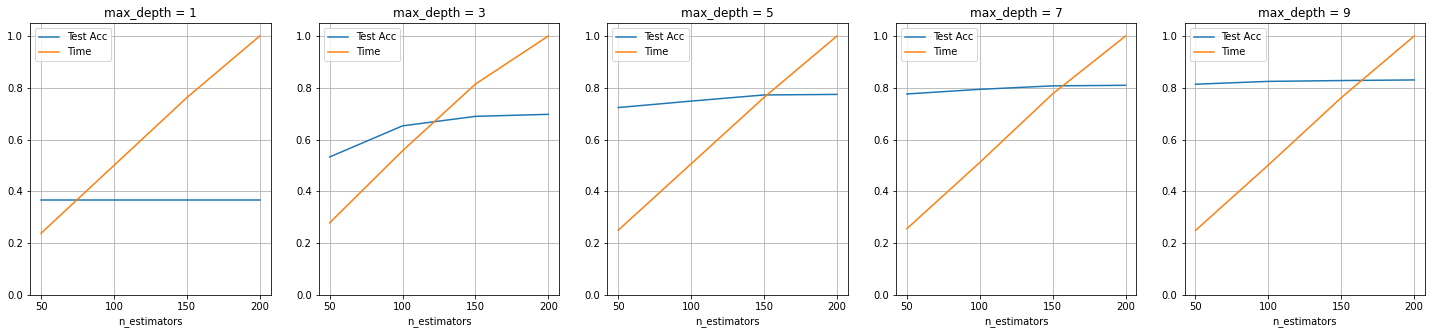

In [ ]:
plt.figure(figsize=(25, 5))
for i in range(1, 6):
    plt.subplot(1, 5, i)
    plt.plot(['50', '100', '150', '200'], te_acc[i-1], label='Test Acc')
    plt.plot(['50', '100', '150', '200'], np.array(r_time[i-1])/max(r_time[i-1]), label='Time')
    plt.legend(loc='best')
    plt.xlabel('n_estimators')
    plt.title(f'max_depth = {2*i-1}')
    plt.ylim([0,1.05])
    plt.grid(True)
plt.show()

We saw that the number of estimators did not improve significantly the accuracy score on the test set, but running time is basically linear on the number of estimators, so from now on we train our model for 50 estimators.

Now we train our model on the entire dataset to have a realistic result, always with different values for the maximum depth of the Decision Tree.

max_depth = 1, n_estimators = 50. Train Acc: 0.5496333333333333, Test Acc: 0.5426. Time: 124 seconds.
max_depth = 3, n_estimators = 50. Train Acc: 0.6690666666666667, Test Acc: 0.6527. Time: 327 seconds.
max_depth = 5, n_estimators = 50. Train Acc: 0.6945166666666667, Test Acc: 0.6712. Time: 524 seconds.
max_depth = 7, n_estimators = 50. Train Acc: 0.7947, Test Acc: 0.736. Time: 714 seconds.
max_depth = 9, n_estimators = 50. Train Acc: 0.9055333333333333, Test Acc: 0.7964. Time: 902 seconds.
max_depth = 11, n_estimators = 50. Train Acc: 0.9825833333333334, Test Acc: 0.8242. Time: 1078 seconds.
max_depth = 13, n_estimators = 50. Train Acc: 1.0, Test Acc: 0.8431. Time: 1247 seconds.
max_depth = 15, n_estimators = 50. Train Acc: 1.0, Test Acc: 0.8618. Time: 1380 seconds.
max_depth = 17, n_estimators = 50. Train Acc: 1.0, Test Acc: 0.8613. Time: 1485 seconds.


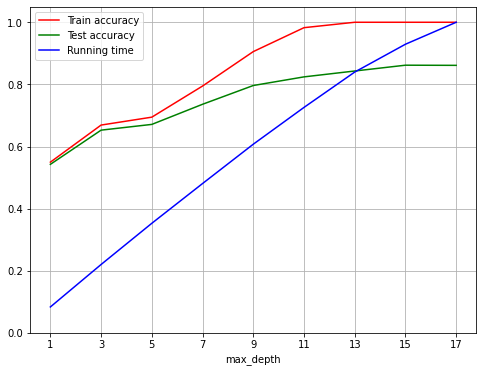

In [ ]:
max_d = [1, 3, 5, 7, 9, 11, 13, 15, 17]
tr_acc = []
te_acc = []
r_time = []

for md in max_d:
  start = datetime.datetime.now()

  clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=md), n_estimators=50)
  clf.fit(X_train, Y_train)
  Y_train_pred = clf.predict(X_train)
  Y_test_pred = clf.predict(X_test)
  train_acc = accuracy_score(Y_train, Y_train_pred)
  test_acc= accuracy_score(Y_test, Y_test_pred)

  difference = datetime.datetime.now()-start

  tr_acc.append(train_acc)
  te_acc.append(test_acc)
  r_time.append(difference.seconds)

  print(f"max_depth = {md}, n_estimators = 50. Train Acc: {train_acc}, Test Acc: {test_acc}. Time: {difference.seconds} seconds.")


time_n = np.array(r_time)/max(r_time)

plt.figure(figsize=(8, 6))
plt.plot(['1', '3', '5', '7', '9', '11', '13', '15', '17'], tr_acc, 'r', label='Train accuracy')
plt.plot(['1', '3', '5', '7', '9', '11', '13', '15', '17'], te_acc, 'g', label='Test accuracy')
plt.plot(['1', '3', '5', '7', '9', '11', '13', '15', '17'], time_n, 'b', label='Running time')
plt.legend(loc='best')
plt.xlabel('max_depth')
plt.ylim([0,1.05])
plt.grid(True)
plt.show()

In conclusion, the accuracy score on the test set improves with higher max_depth values until it reaches the maximum of 0.8618 when max_depth = 15. For higher values the accuracy starts to decrease because

# **2) Ridge Classifier**

Ridge Classifier solves our task as a regression model where the loss function is the linear least square function and regularization is given by the l2-norm.

In [ ]:
from sklearn.linear_model import RidgeClassifier

We check for the better value for the regularization parameter 'alpha' and if the intercept improves or not the performance.

In [ ]:
alphas = [np.e**i for i in range(-5,6)]
boole = [True, False]

tr_acc = []
te_acc = []
r_time = []

for b in boole:
  tr_acc_b = []
  te_acc_b = []
  r_time_b = []
  for a in alphas:
  
    start = datetime.datetime.now()

    clf = RidgeClassifier(alpha=a, fit_intercept=b , solver='auto', random_state=123)
    clf.fit(X_train, Y_train) 
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    train_acc = accuracy_score(Y_train, Y_train_pred)
    test_acc = accuracy_score(Y_test, Y_test_pred)

    difference = datetime.datetime.now()-start


    tr_acc_b.append(train_acc)
    te_acc_b.append(test_acc)
    r_time_b.append(difference.microseconds)

    print(f"intercept = {b}, alpha = {a}. Train Acc: {train_acc}, Test Acc: {test_acc}. Time: {difference.microseconds} microseconds.")
  tr_acc.append(tr_acc_b)
  te_acc.append(te_acc_b)
  r_time.append(r_time_b)

intercept = True, alpha = 0.006737946999085469. Train Acc: 0.83115, Test Acc: 0.8117. Time: 553949 microseconds.
intercept = True, alpha = 0.018315638888734186. Train Acc: 0.83115, Test Acc: 0.8117. Time: 484285 microseconds.
intercept = True, alpha = 0.04978706836786395. Train Acc: 0.83115, Test Acc: 0.8117. Time: 442973 microseconds.
intercept = True, alpha = 0.1353352832366127. Train Acc: 0.8311333333333333, Test Acc: 0.8117. Time: 407248 microseconds.
intercept = True, alpha = 0.36787944117144233. Train Acc: 0.8311333333333333, Test Acc: 0.8118. Time: 441030 microseconds.
intercept = True, alpha = 1.0. Train Acc: 0.831, Test Acc: 0.8116. Time: 407010 microseconds.
intercept = True, alpha = 2.718281828459045. Train Acc: 0.8308666666666666, Test Acc: 0.8115. Time: 576836 microseconds.
intercept = True, alpha = 7.3890560989306495. Train Acc: 0.8306333333333333, Test Acc: 0.8114. Time: 501531 microseconds.
intercept = True, alpha = 20.085536923187664. Train Acc: 0.83025, Test Acc: 0.81

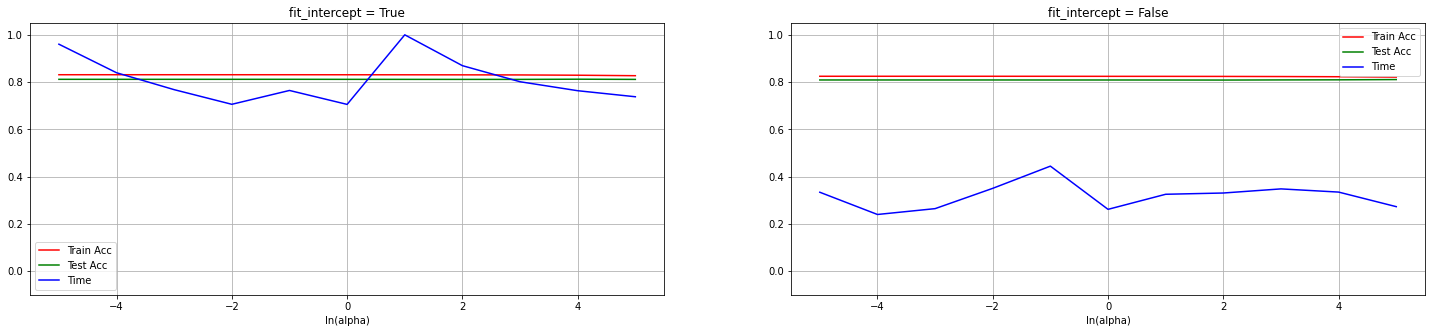

In [ ]:
plt.figure(figsize=(25, 5))
t=max(np.array(r_time[0]+r_time[1]))
for i in range(1, 3):
    plt.subplot(1, 2, i)
    plt.plot(np.log(alphas), tr_acc[i-1], 'r', label='Train Acc')
    plt.plot(np.log(alphas), te_acc[i-1], 'g', label='Test Acc')
    plt.plot(np.log(alphas), np.array(r_time[i-1])/t, 'b', label='Time')
    plt.title(f'fit_intercept = {boole[i-1]}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlabel('ln(alpha)')
    plt.ylim([-.1,1.05])
plt.show()

We saw that the model with fit intercept is slightly better for the accuracy score, but is slower than the model without fit intercept.

Now we want to check if the model predict with the same accuracy every class or there is a class which is misclassified more than the others.

In [ ]:
clf = RidgeClassifier(alpha=np.e**4, fit_intercept=True)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(f"intercept = True, alpha = {np.e**4}. Test Acc: {accuracy_score(Y_test, Y_pred)}")

0.8122


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


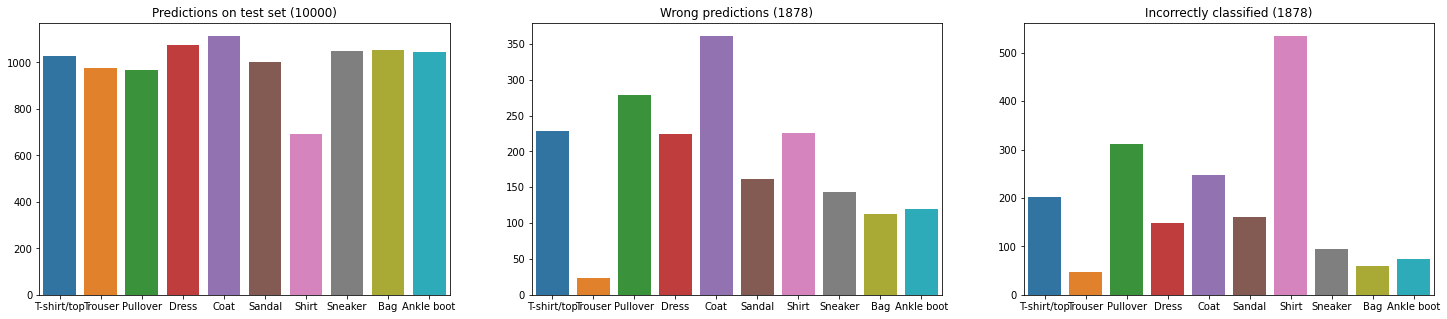

In [ ]:
unique1, counts1 = np.unique(Y_pred, return_counts=True)

Y_w_predicted = Y_pred[Y_pred!=Y_test]
unique2, counts2 = np.unique(Y_w_predicted, return_counts=True)

Y_w_original = Y_test[Y_pred!=Y_test]
unique3, counts3 = np.unique(Y_w_original, return_counts=True)


fig = plt.figure(figsize=(25,5))

ax1 = fig.add_subplot(1,3,1)
ax1 = sns.barplot(Y_labels,counts1)
ax1.set_title(f'Predictions on test set ({len(Y_pred)})')

ax2 = fig.add_subplot(1,3,2)
ax2 = sns.barplot(Y_labels,counts2)
ax2.set_title(f'Wrong predictions ({len(Y_w_predicted)})')

ax3 = fig.add_subplot(1,3,3)
ax3 = sns.barplot(Y_labels,counts3)
ax3.set_title(f'Incorrectly classified ({len(Y_w_original)})')

fig.show()

In conclusion the best accuracy score on the test set is 0.8122, reached for alpha = e^4 and for fit_intercept = True.

We also saw that the Shirt class is the one more often misclassified.

# **3) Support Vector Classifier**

SVC fits the data to return the hyperplane that best divides the categories (the one which creates a larger distance from the classes), using a one-vs-one approach.

We used the already implemented Grid Search, with tree different choices for the kernel, to find the best parameters for SVC. Also in this case we used a 10000 training set for time issues.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
# linear kernel
startA = datetime.datetime.now()

parameters = {'C': [1, 10, 100]}
linear_SVM = SVC(kernel='linear')
A = GridSearchCV(linear_SVM,parameters,cv=5,refit=True)
A.fit(X_train[:10000],Y_train[:10000])

differenceA = datetime.datetime.now()-startA
print (f'LINEAR KERNEL (Running time {differenceA.seconds}s)')
print("Best parameters set found: ", A.best_params_)
print("Score with best parameters: ", A.best_score_)
print("All scores on the grid:", A.cv_results_['mean_test_score'])


# poly degree=2 kernel
startB = datetime.datetime.now()

parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}
poly2_SVM = SVC(kernel='poly',degree=2)
B = GridSearchCV(poly2_SVM,parameters,cv=5,refit=True)
B.fit(X_train[:10000],Y_train[:10000])

differenceB = datetime.datetime.now()-startB
print (f'\nPOLY DEGREE=2 KERNEL (Running time {differenceB.seconds}s)')
print("Best parameters set found: ", B.best_params_)
print("Score with best parameters: ", B.best_score_)
print("All scores on the grid: ", B.cv_results_['mean_test_score'] )


# rbf kernel
startC = datetime.datetime.now()

parameters = {'C': [1, 10, 100],'gamma':[0.01,0.1,1.]}
rbf_SVM = SVC(kernel='rbf')
C = GridSearchCV(rbf_SVM,parameters,cv=5,refit=True)
C.fit(X_train[:10000],Y_train[:10000])

differenceC = datetime.datetime.now()-startC
print (f'\nRBF KERNEL (Running time {differenceC.seconds}s)')
print("Best parameters set found: ", C.best_params_) 
print("Score with best parameters: ", C.best_score_)
print("All scores on the grid: ", C.cv_results_['mean_test_score'])

LINEAR KERNEL (Running time 137s)
Best parameters set found:  {'C': 1}
Score with best parameters:  0.8262
All scores on the grid: [0.8262 0.8077 0.8024]

POLY DEGREE=2 KERNEL (Running time 296s)
Best parameters set found:  {'C': 10, 'gamma': 0.01}
Score with best parameters:  0.8541000000000001
All scores on the grid:  [0.844  0.8443 0.8435 0.8541 0.8434 0.8435 0.8443 0.8434 0.8435]

RBF KERNEL (Running time 1730s)
Best parameters set found:  {'C': 10, 'gamma': 0.01}
Score with best parameters:  0.8718
All scores on the grid:  [0.859  0.7963 0.1597 0.8718 0.8053 0.1683 0.8675 0.8053 0.1683]


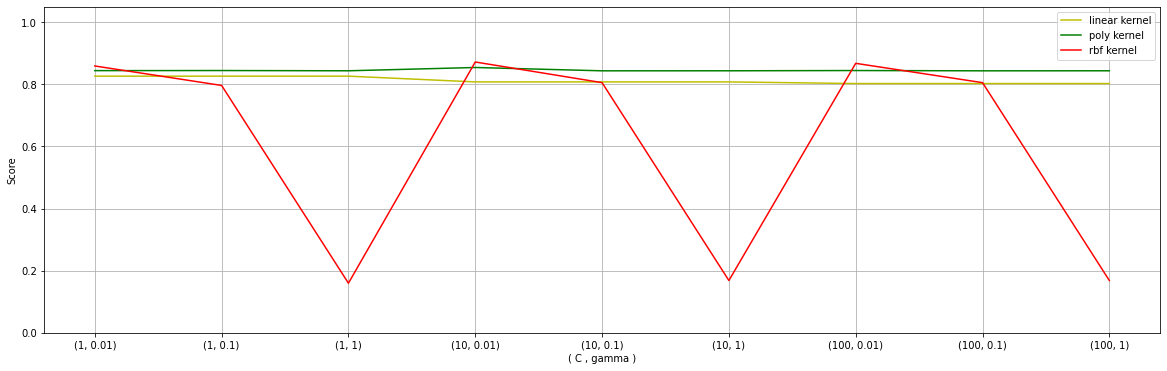

In [ ]:
gA = A.cv_results_['mean_test_score']
lA = [gA[0],gA[0],gA[0],gA[1],gA[1],gA[1],gA[2],gA[2],gA[2]]
xax = ['(1, 0.01)','(1, 0.1)','(1, 1)','(10, 0.01)','(10, 0.1)','(10, 1)','(100, 0.01)','(100, 0.1)','(100, 1)']

plt.figure(figsize=(20, 6))

plt.plot(xax, lA, 'y', label='linear kernel')
plt.plot(xax, B.cv_results_['mean_test_score'], 'g', label='poly kernel')
plt.plot(xax, C.cv_results_['mean_test_score'], 'r', label='rbf kernel')
plt.legend(loc='best')
plt.xlabel('( C , gamma )')
plt.ylabel('Score')
plt.ylim([0,1.05])
plt.grid(True)

plt.show()

The highest score is obtained with rbf kernel, C = 10 and gamma = 0.01, so we can now check on the entire data set the accuracy score.

In [ ]:
[c, k, g] = [10, 'rbf', 0.01]
start = datetime.datetime.now()

clf = SVC(C=c, kernel=k, gamma=g)

clf.fit(X_train, Y_train)
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)
tr_acc = accuracy_score(Y_train, Y_train_pred)
test_acc= accuracy_score(Y_test, Y_test_pred)

difference = datetime.datetime.now()-start
print(f"BEST MODEL: {k} kernel with C={c} and gamma={g} (Running time {difference.seconds}s)")
print(f"Training accuracy: {tr_acc}, Test accuracy: {test_acc}")

BEST MODEL: rbf kernel with C=10 and gamma=0.01 (Running time 1659s)
Training accuracy: 0.9707333333333333, Test accuracy: 0.9002


Now we want to check if the model predict with the same accuracy every class or there is a class which is misclassified more than the others.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


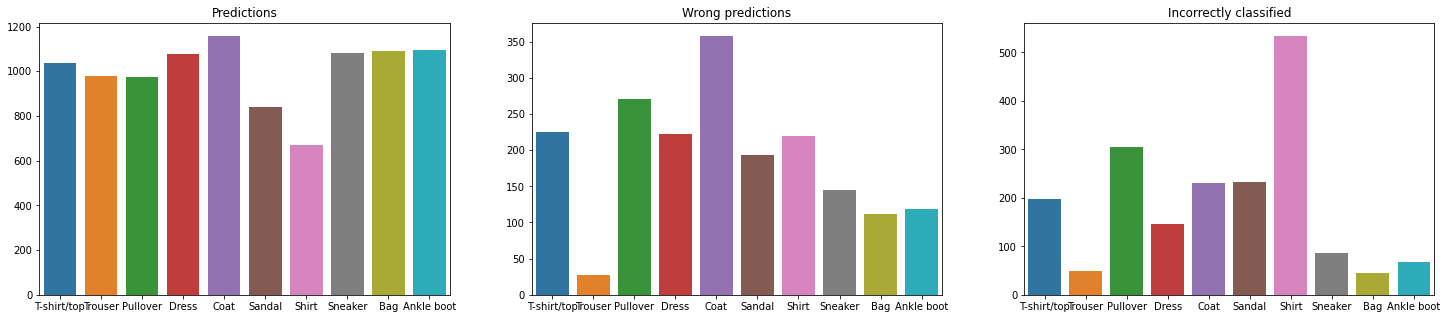

In [ ]:
unique1, counts1 = np.unique(Y_test_pred, return_counts=True)

Y_w_predicted = Y_pred[Y_test_pred!=Y_test]
unique2, counts2 = np.unique(Y_w_predicted, return_counts=True)

Y_w_original = Y_test[Y_test_pred!=Y_test]
unique3, counts3 = np.unique(Y_w_original, return_counts=True)


fig = plt.figure(figsize=(25,5))

ax1 = fig.add_subplot(1,3,1)
ax1 = sns.barplot(Y_labels,counts1)
ax1.set_title(f'Predictions on test set ({len(Y_pred)})')

ax2 = fig.add_subplot(1,3,2)
ax2 = sns.barplot(Y_labels,counts2)
ax2.set_title(f'Wrong predictions ({len(Y_w_predicted)})')

ax3 = fig.add_subplot(1,3,3)
ax3 = sns.barplot(Y_labels,counts3)
ax3.set_title(f'Incorrectly classified ({len(Y_w_original)})')

fig.show()

In conclusion the best accuracy score on the test set is 0.9002, obtained with rbf kernel, C = 10 and gamma = 0.01.

We also saw that, like the previous model, the Shirt class is the most misclassified.

# **4) NN**

We want to see if a Neural Network can outperform the others models. A NN is based on a collection of connected units or nodes called artificial neurons, which are aggregated into layers. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. 

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.python.framework.random_seed import set_random_seed

First we have to process the data and define an early stopping condition.

In [ ]:
feature_vector_length = len(X_train[0])
num_classes = 10

Y_train_cat = to_categorical(Y_train, num_classes)
Y_test_cat = to_categorical([Y_test for x in range(len(Y_test))], num_classes)

es = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)

We start implementing a Neural Network with 3, 5 and 7 layers, in order to determine what choice is the better one.

3 layers. Train Acc: 0.8851, Test Acc: 0.8643, Time: 58s.
5 layers. Train Acc: 0.8961, Test Acc: 0.8750, Time: 75s.
7 layers. Train Acc: 0.8987, Test Acc: 0.8707, Time: 95s.


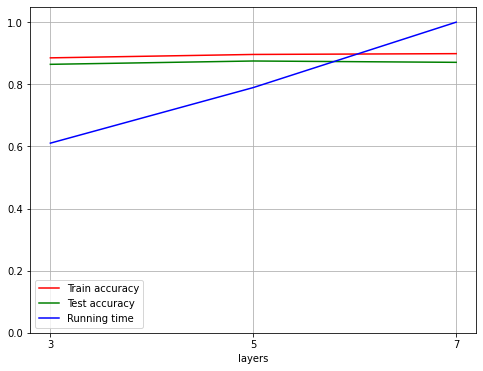

In [ ]:
layers = [3, 5, 7]
tr_acc = []
te_acc = []
r_time = []

for l in layers:
  np.random.seed(123)
  set_random_seed(2)
  start = datetime.datetime.now()

  model = Sequential()
  model.add(Dense(input_dim=feature_vector_length, units=220 , activation='relu'))
  for i in range(l-2):
    model.add(Dense(units=220, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

  history = model.fit(X_train, Y_train_cat, epochs=10, verbose=0)

  Y_train_pred = model.predict(X_train).argmax(axis = 1) 
  Y_test_pred = model.predict(X_test).argmax(axis = 1)

  difference = datetime.datetime.now()-start
  tr_acc.append(accuracy_score(Y_train, Y_train_pred))
  te_acc.append(accuracy_score(Y_test, Y_test_pred))
  r_time.append(difference.seconds)
  print(f"{l} layers. Train Acc: {accuracy_score(Y_train, Y_train_pred):.4f}, Test Acc: {accuracy_score(Y_test, Y_test_pred):.4f}, Time: {difference.seconds}s.")


time_n = np.array(r_time)/max(r_time)

plt.figure(figsize=(8, 6))
plt.plot(['3', '5', '7'], tr_acc, 'r', label='Train accuracy')
plt.plot(['3', '5', '7'], te_acc, 'g', label='Test accuracy')
plt.plot(['3', '5', '7'], time_n, 'b', label='Running time')
plt.legend(loc='best')
plt.xlabel('layers')
plt.ylim([0,1.05])
plt.grid(True)
plt.show()

The accuracies are similar, but the NN with 3 layers takes way less time than the others two NNs.
From now on we use 3 layered Neural Networks.

Now we want to see what choice of the number of neurons per layer is the better one.

3 layers, (110, 110, 10) neurons per layer. Train Acc: 0.8799, Test Acc: 0.8638, Time: 44s.
3 layers, (440, 440, 10) neurons per layer. Train Acc: 0.8891, Test Acc: 0.8680, Time: 109s.
3 layers, (330, 110, 10) neurons per layer. Train Acc: 0.8861, Test Acc: 0.8647, Time: 88s.
3 layers, (550, 330, 10) neurons per layer. Train Acc: 0.8901, Test Acc: 0.8677, Time: 119s.


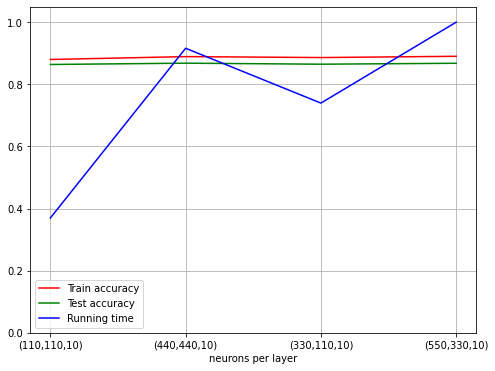

In [ ]:
neurons = [(110,110),(440,440),(330,110),(550,330)]
tr_acc = []
te_acc = []
r_time = []

for n in neurons:
  np.random.seed(123)
  set_random_seed(2)
  start = datetime.datetime.now()

  model = Sequential()
  model.add(Dense(input_dim=feature_vector_length, units=n[0] , activation='relu'))
  model.add(Dense(units=n[1], activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

  history = model.fit(X_train, Y_train_cat, epochs=10, verbose=0)

  Y_train_pred = model.predict(X_train).argmax(axis = 1) 
  Y_test_pred = model.predict(X_test).argmax(axis = 1)

  difference = datetime.datetime.now()-start
  tr_acc.append(accuracy_score(Y_train, Y_train_pred))
  te_acc.append(accuracy_score(Y_test, Y_test_pred))
  r_time.append(difference.seconds)
  print(f"3 layers, {(n[0],n[1],10)} neurons per layer. Train Acc: {accuracy_score(Y_train, Y_train_pred):.4f}, Test Acc: {accuracy_score(Y_test, Y_test_pred):.4f}, Time: {difference.seconds}s.")


time_n = np.array(r_time)/max(r_time)

plt.figure(figsize=(8, 6))
plt.plot(['(110,110,10)','(440,440,10)','(330,110,10)','(550,330,10)'], tr_acc, 'r', label='Train accuracy')
plt.plot(['(110,110,10)','(440,440,10)','(330,110,10)','(550,330,10)'], te_acc, 'g', label='Test accuracy')
plt.plot(['(110,110,10)','(440,440,10)','(330,110,10)','(550,330,10)'], time_n, 'b', label='Running time')
plt.legend(loc='best')
plt.xlabel('neurons per layer')
plt.ylim([0,1.05])
plt.grid(True)
plt.show()

Like we saw before, the accuracies are similar but the choice of 110 neurons for the first two layers is much faster.
From now on we use NNs with 3 layers and 110 neurons for the first two layers.

We want to see if more epochs improve the performance. An early stopping is applied to avoid overfitting.

3 layers, (110, 110, 10) neurons per layer, 10 epochs. Train Acc: 0.8734, Test Acc: 0.8578, Time: 39s.
Epoch 00018: early stopping
3 layers, (110, 110, 10) neurons per layer, 30 epochs. Train Acc: 0.8872, Test Acc: 0.8633, Time: 67s.
Epoch 00018: early stopping
3 layers, (110, 110, 10) neurons per layer, 50 epochs. Train Acc: 0.8872, Test Acc: 0.8633, Time: 85s.


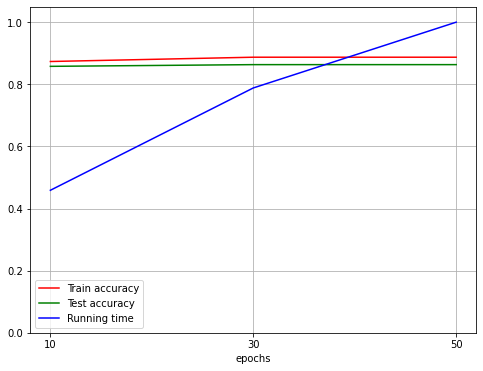

In [ ]:
epochs = [10, 30, 50]
tr_acc = []
te_acc = []
r_time = []

for e in epochs:
  np.random.seed(123)
  set_random_seed(2)
  start = datetime.datetime.now()

  model = Sequential()
  model.add(Dense(input_dim=feature_vector_length, units=110 , activation='relu'))
  model.add(Dense(units=110, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

  history = model.fit(X_train, Y_train_cat, epochs=e, verbose=0, validation_split=0.1, callbacks=[es])

  Y_train_pred = model.predict(X_train).argmax(axis = 1) 
  Y_test_pred = model.predict(X_test).argmax(axis = 1)

  difference = datetime.datetime.now()-start
  tr_acc.append(accuracy_score(Y_train, Y_train_pred))
  te_acc.append(accuracy_score(Y_test, Y_test_pred))
  r_time.append(difference.seconds)
  print(f"3 layers, (110, 110, 10) neurons per layer, {e} epochs. Train Acc: {accuracy_score(Y_train, Y_train_pred):.4f}, Test Acc: {accuracy_score(Y_test, Y_test_pred):.4f}, Time: {difference.seconds}s.")


time_n = np.array(r_time)/max(r_time)

plt.figure(figsize=(8, 6))
plt.plot(['10', '30', '50'], tr_acc, 'r', label='Train accuracy')
plt.plot(['10', '30', '50'], te_acc, 'g', label='Test accuracy')
plt.plot(['10', '30', '50'], time_n, 'b', label='Running time')
plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylim([0,1.05])
plt.grid(True)
plt.show()

The early stopping decreased the accuracy score on the test set, because the model is trained on a 10% smaller set in order to leave a portion to the validation set.

In conclusion, we think that the best model is a 3 layered Neural Network with 110 neurons for the first two layers and 18 epochs (resulting from the early stopping).

In [ ]:
np.random.seed(123)
set_random_seed(2)
start = datetime.datetime.now()

model = Sequential()
model.add(Dense(input_dim=feature_vector_length, units=110 , activation='relu'))
model.add(Dense(units=110, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(X_train, Y_train_cat, epochs=18, verbose=0)

Y_train_pred = model.predict(X_train).argmax(axis = 1) 
Y_test_pred = model.predict(X_test).argmax(axis = 1)

difference = datetime.datetime.now()-start
print(f"3 layers, (110, 110, 10) neurons per layer, 18 epochs. Train Acc: {accuracy_score(Y_train, Y_train_pred):.4f}, Test Acc: {accuracy_score(Y_test, Y_test_pred):.4f}, Time: {difference.seconds}s.")

3 layers, (110, 110, 10) neurons per layer, 18 epochs. Train Acc: 0.8987, Test Acc: 0.8754, Time: 85s.


Now we want to check if the model predict with the same accuracy every class or there is a class which is misclassified more than the others.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


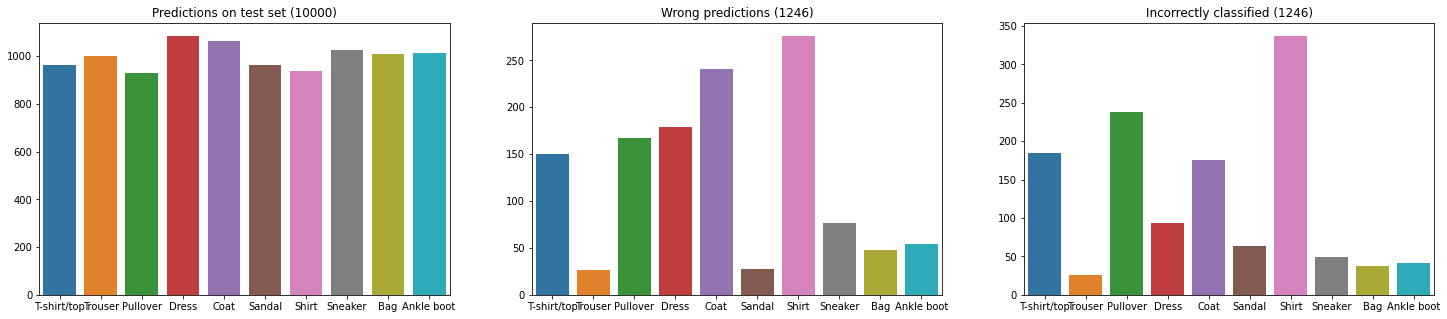

In [ ]:
unique1, counts1 = np.unique(Y_test_pred, return_counts=True)

Y_w_predicted = Y_test_pred[Y_test_pred!=Y_test]
unique2, counts2 = np.unique(Y_w_predicted, return_counts=True)

Y_w_original = Y_test[Y_test_pred!=Y_test]
unique3, counts3 = np.unique(Y_w_original, return_counts=True)


fig = plt.figure(figsize=(25,5))

ax1 = fig.add_subplot(1,3,1)
ax1 = sns.barplot(Y_labels,counts1)
ax1.set_title(f'Predictions on test set ({len(Y_test_pred)})')

ax2 = fig.add_subplot(1,3,2)
ax2 = sns.barplot(Y_labels,counts2)
ax2.set_title(f'Wrong predictions ({len(Y_w_predicted)})')

ax3 = fig.add_subplot(1,3,3)
ax3 = sns.barplot(Y_labels,counts3)
ax3.set_title(f'Incorrectly classified ({len(Y_w_original)})')

fig.show()

As always the Shirt class is misclassified the most.

# Conclusions

In the following table are displayed the performances of the best models we found.

In [ ]:
dataframe = pd.DataFrame(np.array([[1.0,0.8618,'1380s'],[0.8291,0.8122,'0.44s'],[0.9707,0.9002,'1659s'],[0.8987,0.8754,'85s']]),
                          columns=['Training Accuracy','Test Accuracy','Running Time'],
                          index=['AdaBoost Classifier','Ridge Classifier','Support Vector Classifier','Neural Network'])
dataframe

,Training Accuracy,Test Accuracy,Running Time
AdaBoost Classifier,1.0,0.8618,1380s
Ridge Classifier,0.8291,0.8122,0.44s
Support Vector Classifier,0.9707,0.9002,1659s
Neural Network,0.8987,0.8754,85s


Our results show that the the best accuracy score is obtained with a SVC model, although is by far the slowest one. On the other hand, the Ridge Classifier is the fastest model but the less accurate. All things considered we think that a good compromise between time and accuracy is the better solution, so in this case we are inclined to choose the Neural Network model.